In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("data/00_results.txt", sep="\t")
print(df.shape[0])
df.head()

560


,scene,sigma,num_col
0,0,0.01,99
1,0,0.03,61
2,0,0.05,33
3,0,0.07,18
4,0,0.09,17


In [35]:
no_col = df[(df["num_col"] == 0) & (df["sigma"] == 0.01)]
no_col.shape[0]
no_col_idx = set(no_col["scene"])
all_no_col = df[df["scene"].isin(no_col_idx)]
all_no_col[all_no_col["num_col"] != 0]

#if 0.01 = no col, all above don't have one


,scene,sigma,num_col


Text(0.5, 1.0, 'Shaded region represent 95% of values \n noise was added on a CORUPTED trajectory (that resulted in a colision when given to the network)')

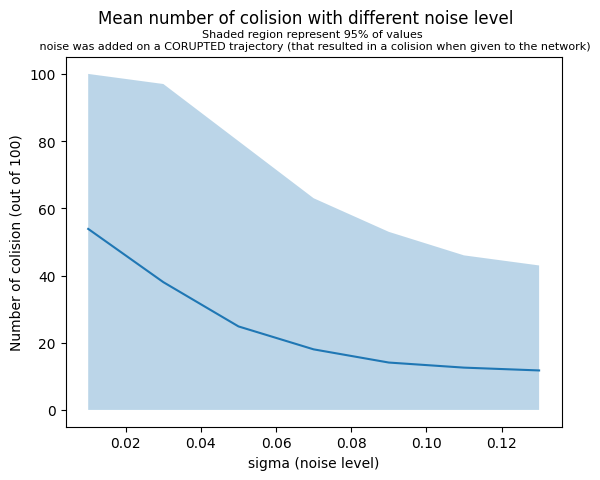

In [78]:
m = df.groupby("sigma")["num_col"].mean()
q_05 = df.groupby("sigma")["num_col"].quantile(0.025)
q_95 = df.groupby("sigma")["num_col"].quantile(0.975)
min = df.groupby("sigma")["num_col"].min()
max = df.groupby("sigma")["num_col"].max()
plt.plot(m)
plt.fill_between(min.index, min, max, alpha = 0.3)
plt.xlabel("sigma (noise level)")
plt.ylabel("Number of colision (out of 100)")
plt.suptitle("Mean number of colision with different noise level")
plt.title("Shaded region represent 95% of values \n noise was added on a CORUPTED trajectory " +
          "(that resulted in a colision when given to the network)", fontsize = 8)